# Using SVD to do Dimensionality Reduction on MNIST Dataset by `Mr. Harshit Dawar!`

* **Note: Using normal SVD form either Numpy or Scipy, one can't mention the no. of features to select, whereas, using truncated SVD, gives you the authority to mention the no. of features to select. Also, TruncatedSVD only calculates Feature Wise EigenVectors i.e. Right Singular Vectors, whereas normal SVD calculates everything. These Right Singular Vectors are accessible by using `.components_` attribute of the SVD Object!**


* **Moreover, SVD use-cases are data compression & dimensionality reduction, whereas PCA can be used for dimensionality reduction, & the situations where the variance is most concerned thing. PCA internally uses SVD to decompose the covariance matrix instead of performing EigenDecomposition because SVD is much more efficient than the normal Eigen Decomposition as it can handle sparse matrixes (non-squre matrices).**

## Importing the required Libraries

In [18]:
import numpy as np
import pandas as pd
from sklearn.decomposition import TruncatedSVD
from sklearn.datasets import load_digits
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## Data Preprocessing

In [6]:
# Loading the dataset
digits_data = load_digits()

In [8]:
features = pd.DataFrame(digits_data.data, columns=digits_data.feature_names)
target = digits_data.target

In [9]:
features

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [11]:
target.shape

(1797,)

In [15]:
# Normalizing the data: Images data should be normalized instead of standardized
normalizer = MinMaxScaler()
features = pd.DataFrame(normalizer.fit_transform(features), columns=digits_data.feature_names)

In [28]:
features

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,0.3125,0.8125,0.5625,0.0625,0.0000,0.0,0.0,0.0000,...,0.0000,0.0,0.0,0.000000,0.3750,0.8125,0.6250,0.0000,0.0000,0.0
1,0.0,0.0,0.0000,0.7500,0.8125,0.3125,0.0000,0.0,0.0,0.0000,...,0.0000,0.0,0.0,0.000000,0.0000,0.6875,1.0000,0.6250,0.0000,0.0
2,0.0,0.0,0.0000,0.2500,0.9375,0.7500,0.0000,0.0,0.0,0.0000,...,0.3125,0.0,0.0,0.000000,0.0000,0.1875,0.6875,1.0000,0.5625,0.0
3,0.0,0.0,0.4375,0.9375,0.8125,0.0625,0.0000,0.0,0.0,0.5000,...,0.5625,0.0,0.0,0.000000,0.4375,0.8125,0.8125,0.5625,0.0000,0.0
4,0.0,0.0,0.0000,0.0625,0.6875,0.0000,0.0000,0.0,0.0,0.0000,...,0.0000,0.0,0.0,0.000000,0.0000,0.1250,1.0000,0.2500,0.0000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,0.2500,0.6250,0.8125,0.3750,0.0000,0.0,0.0,0.0625,...,0.2500,0.0,0.0,0.000000,0.1250,0.8750,0.9375,0.5625,0.0000,0.0
1793,0.0,0.0,0.3750,1.0000,0.8125,0.6875,0.0625,0.0,0.0,0.0000,...,0.0625,0.0,0.0,0.000000,0.3750,1.0000,0.8750,0.3750,0.0000,0.0
1794,0.0,0.0,0.0625,0.6875,0.9375,0.0625,0.0000,0.0,0.0,0.0000,...,0.0000,0.0,0.0,0.000000,0.1250,0.5625,0.8125,0.3750,0.0000,0.0
1795,0.0,0.0,0.1250,0.6250,0.4375,0.0000,0.0000,0.0,0.0,0.0000,...,0.1250,0.0,0.0,0.000000,0.3125,0.7500,1.0000,0.7500,0.0000,0.0


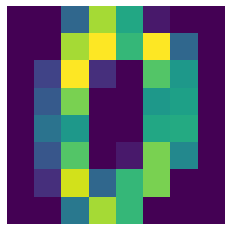

In [30]:
plt.imshow(features.iloc[0].values.reshape(8, 8))
plt.axis("OFF")
plt.show()

## Reducing the Data

In [86]:
# Let's take 9 most dominant components out of 64 cmponenets
SVD = TruncatedSVD(n_components = 9)

Dim_Red_Features = SVD.fit_transform(features)

In [87]:
SVD.feature_names_in_

array(['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4',
       'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1',
       'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6',
       'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3',
       'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0',
       'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5',
       'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2',
       'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7',
       'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4',
       'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1',
       'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6',
       'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3',
       'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7'], dtype=object)

In [88]:
SVD.explained_variance_

array([0.13409556, 0.70668974, 0.64454083, 0.55752725, 0.39580548,
       0.27347402, 0.22370023, 0.19873502, 0.17328804])

In [102]:
print("We have captured {:.2f}% variance of the complete dataset!".format(np.sum(SVD.explained_variance_ratio_ * 100)))

We have captured 69.34% variance of the complete dataset!


In [103]:
Dim_Red_Features.shape

(1797, 9)

In [104]:
print("Eigen Values of the {} most dominant Eigen Vectors (Descending Order): \n {}".format(
    SVD.singular_values_.shape[0], SVD.singular_values_))

Eigen Values of the 9 most dominant Eigen Vectors (Descending Order): 
 [137.22816749  35.6359878   34.03364641  31.65347328  26.67026024
  22.16836424  20.05224172  18.89935467  17.64701988]


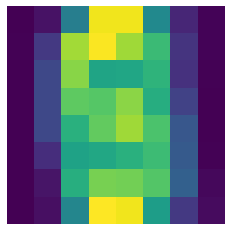

In [105]:
plt.imshow(SVD.components_[0].reshape(8,8))
plt.axis("OFF")
plt.show()

In [101]:
SVD.components_[0].shape

(64,)